In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
df = pd.read_csv("/Adatok_energy prod and cons.csv")
df = df.set_index("DateTime")
df.index = pd.to_datetime(df.index, format='%d-%m-%y %H:%M')

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [7]:
print(df.shape)

(46011, 9)


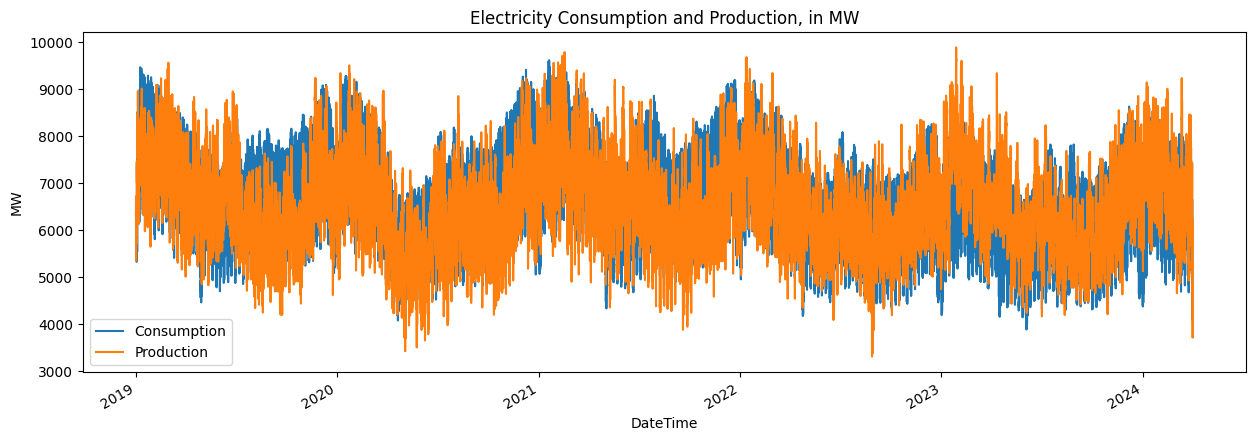

In [8]:
# Let's start with a broad overview, this is the electricity consumption and production plot for our entiere data set

df[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

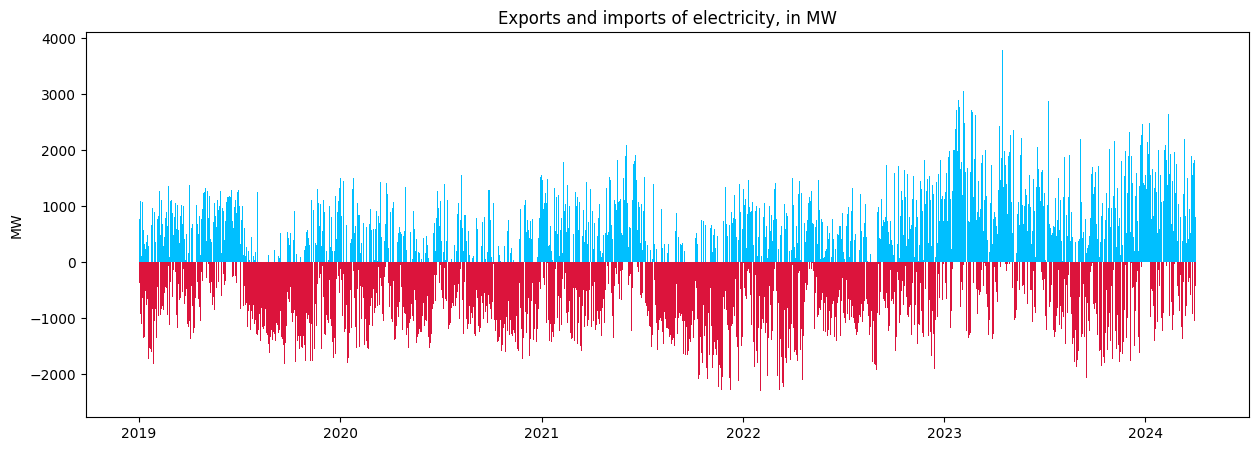

CPU times: user 1min 20s, sys: 2.95 s, total: 1min 22s
Wall time: 1min 32s


In [9]:
%%time

# add a new column for the delta
df["delta"] = df["Production"] - df["Consumption"]

plt.rcParams["figure.figsize"] = (15,5)

plt.bar(
    df.index, df['delta'],
    color=np.where(df['delta'] > 0, 'deepskyblue', 'crimson')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

# drop the column we have used for the delta
df.drop(["delta"], axis=1, inplace=True)

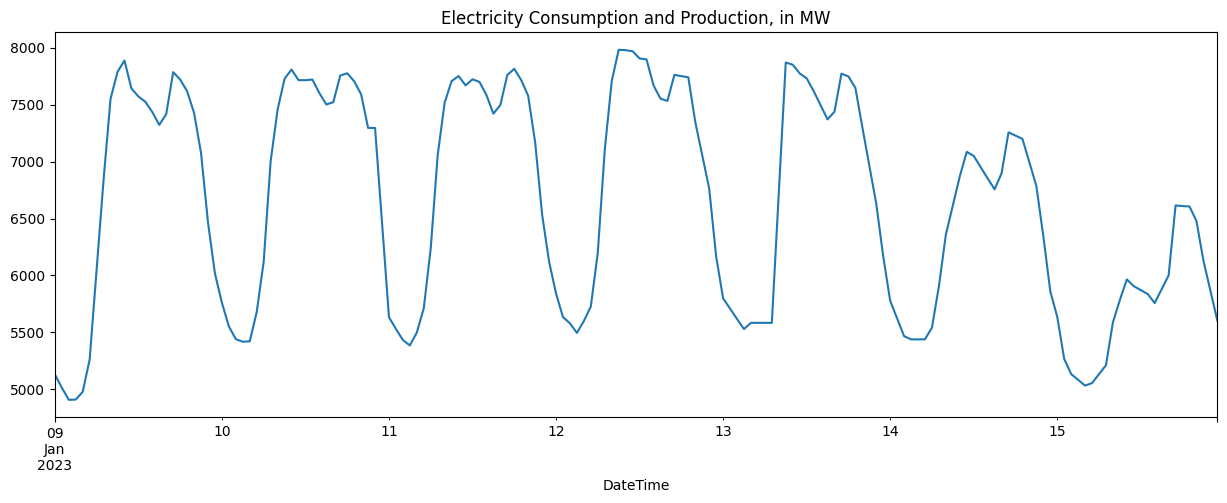

In [10]:
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["Consumption"].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.show()

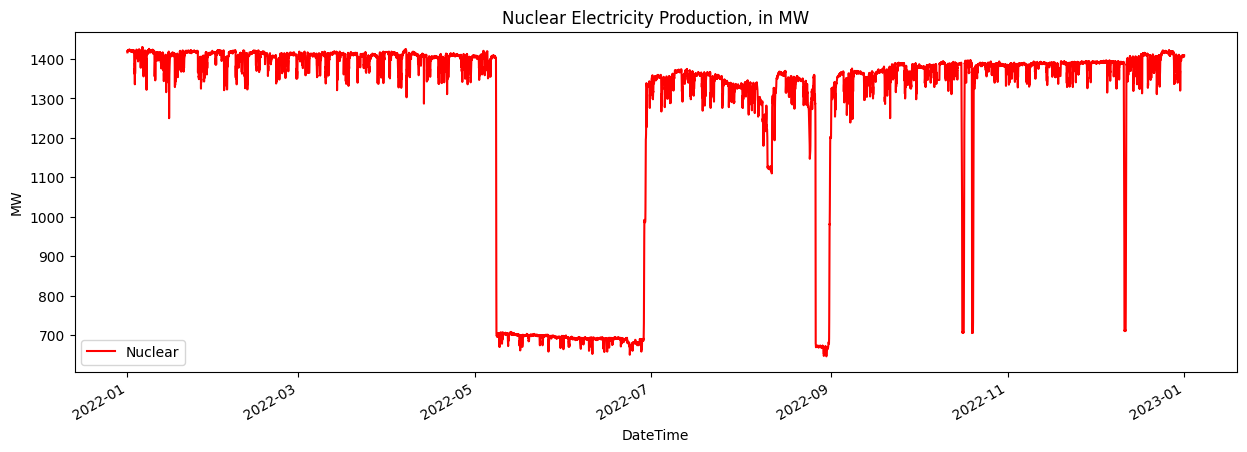

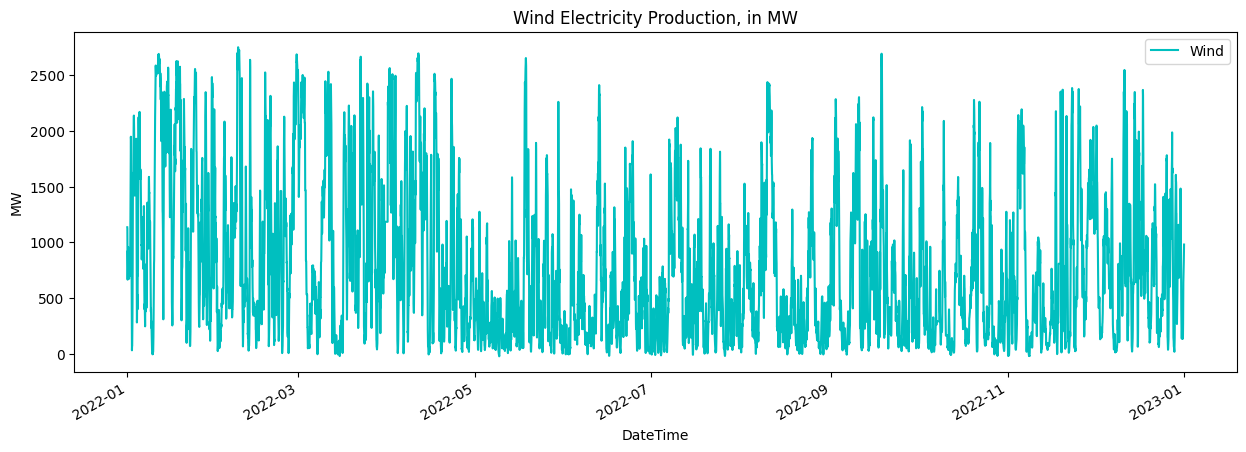

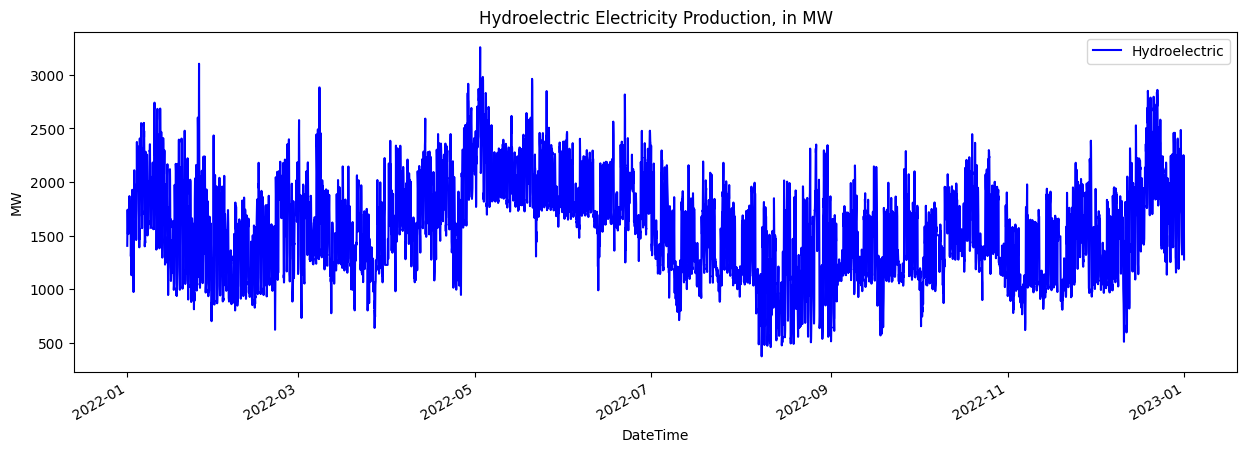

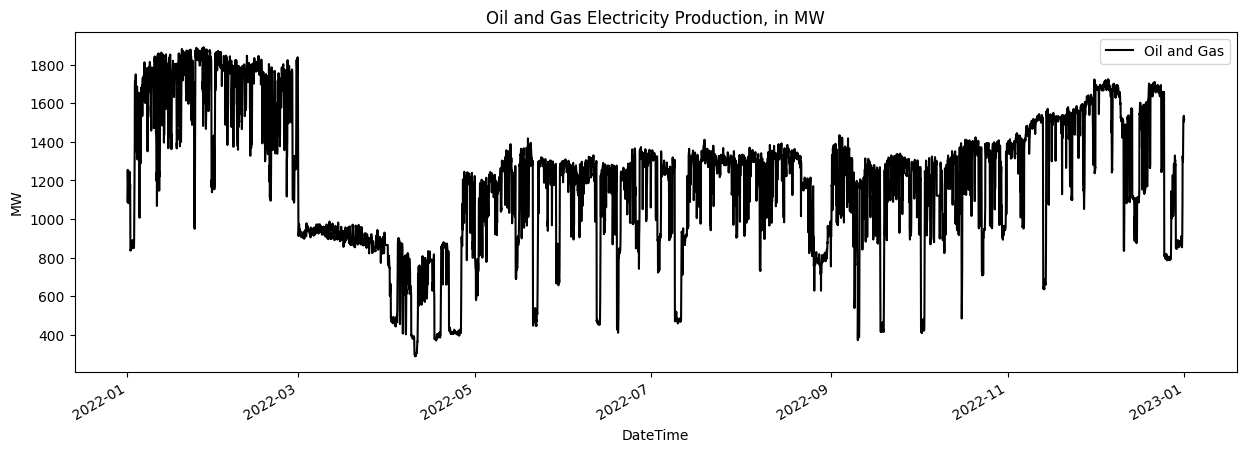

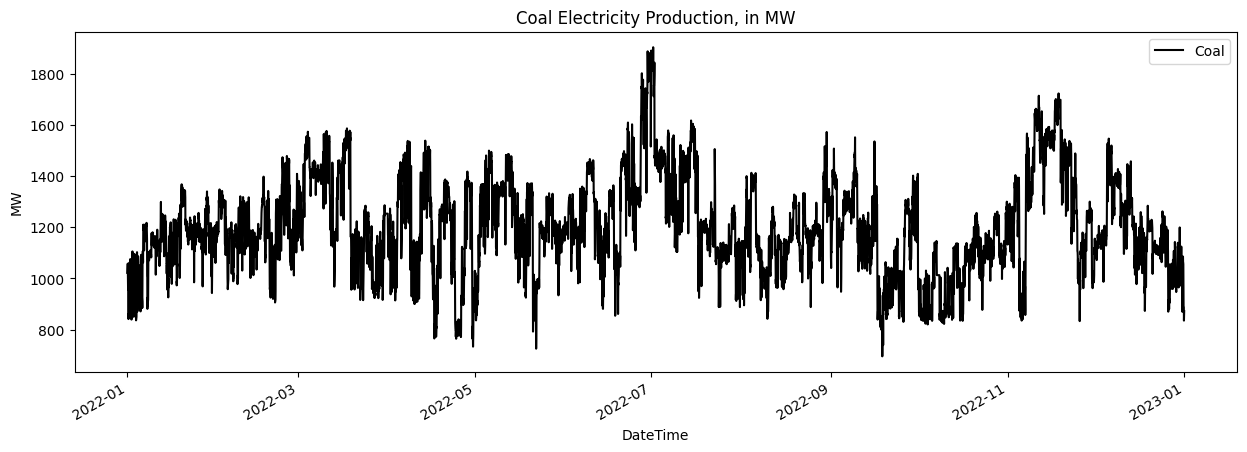

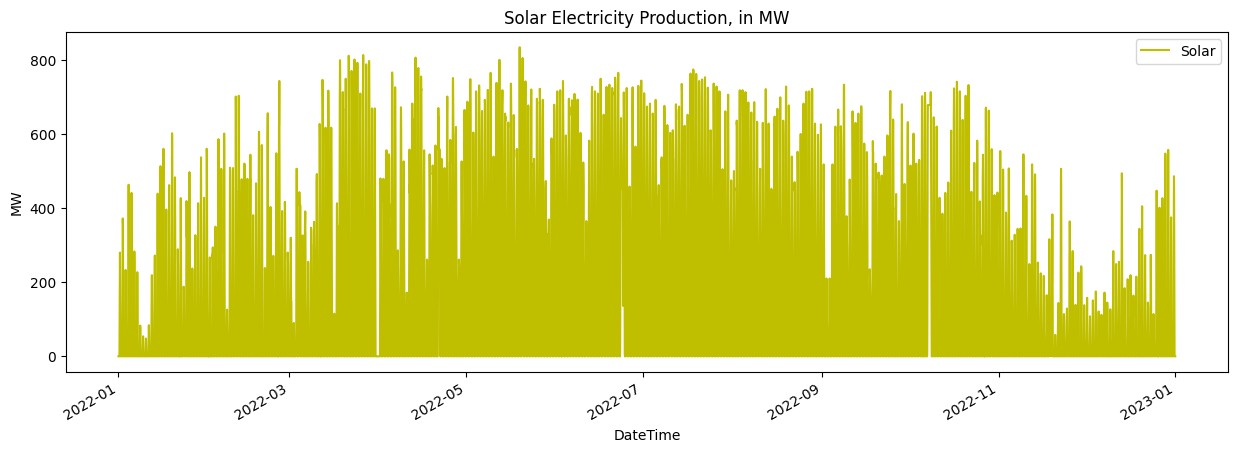

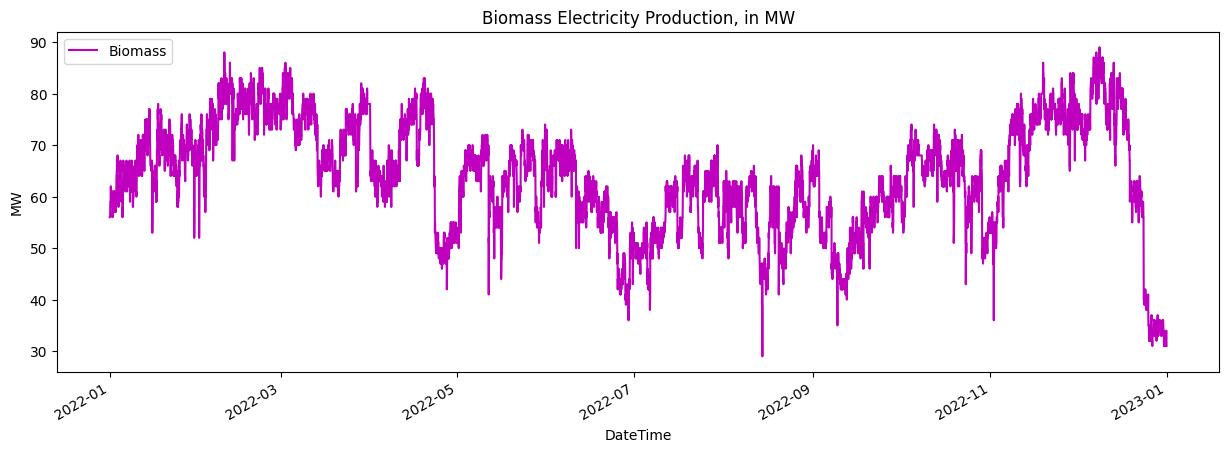

In [12]:
dfYear = df["2022-01-01 00:00:00" : "2022-12-31 23:59:59"]
productionTypes = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

colorMap = {"Nuclear":"r", "Wind":"c", "Hydroelectric":"b", "Oil and Gas":"k", "Coal":"k", "Solar":"y", "Biomass":"m"}

for productionType in productionTypes:
    dfYear[[productionType]].plot(style="-", figsize=(15, 5), title=f"{productionType} Electricity Production, in MW", color=colorMap.get(productionType))
    plt.ylabel('MW')
    plt.show()

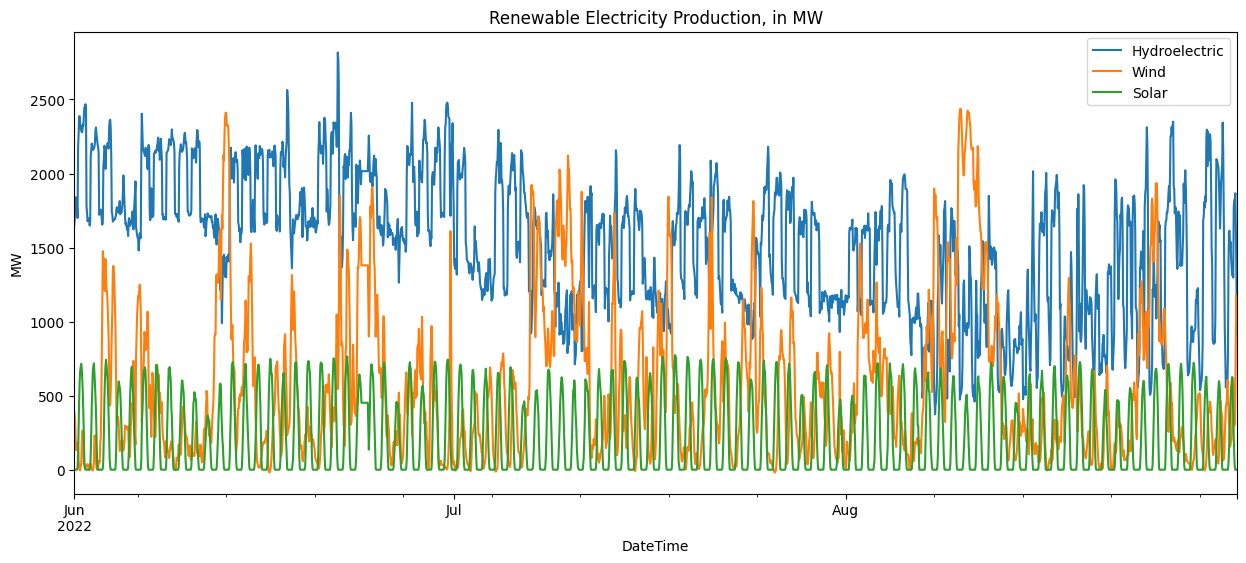

In [13]:
dfSummer = df[["Hydroelectric", "Wind", "Solar"]]["2022-06-01 00:00:00" : "2022-08-31 23:59:59"]
dfSummer.plot(style="-", figsize=(15, 6), title=f"Renewable Electricity Production, in MW")
plt.ylabel('MW')
plt.show()

2019 8761 <class 'pandas.core.frame.DataFrame'>
2020 8785 <class 'pandas.core.frame.DataFrame'>
2021 8761 <class 'pandas.core.frame.DataFrame'>
2022 8761 <class 'pandas.core.frame.DataFrame'>
2023 8760 <class 'pandas.core.frame.DataFrame'>
2024 2183 <class 'pandas.core.frame.DataFrame'>


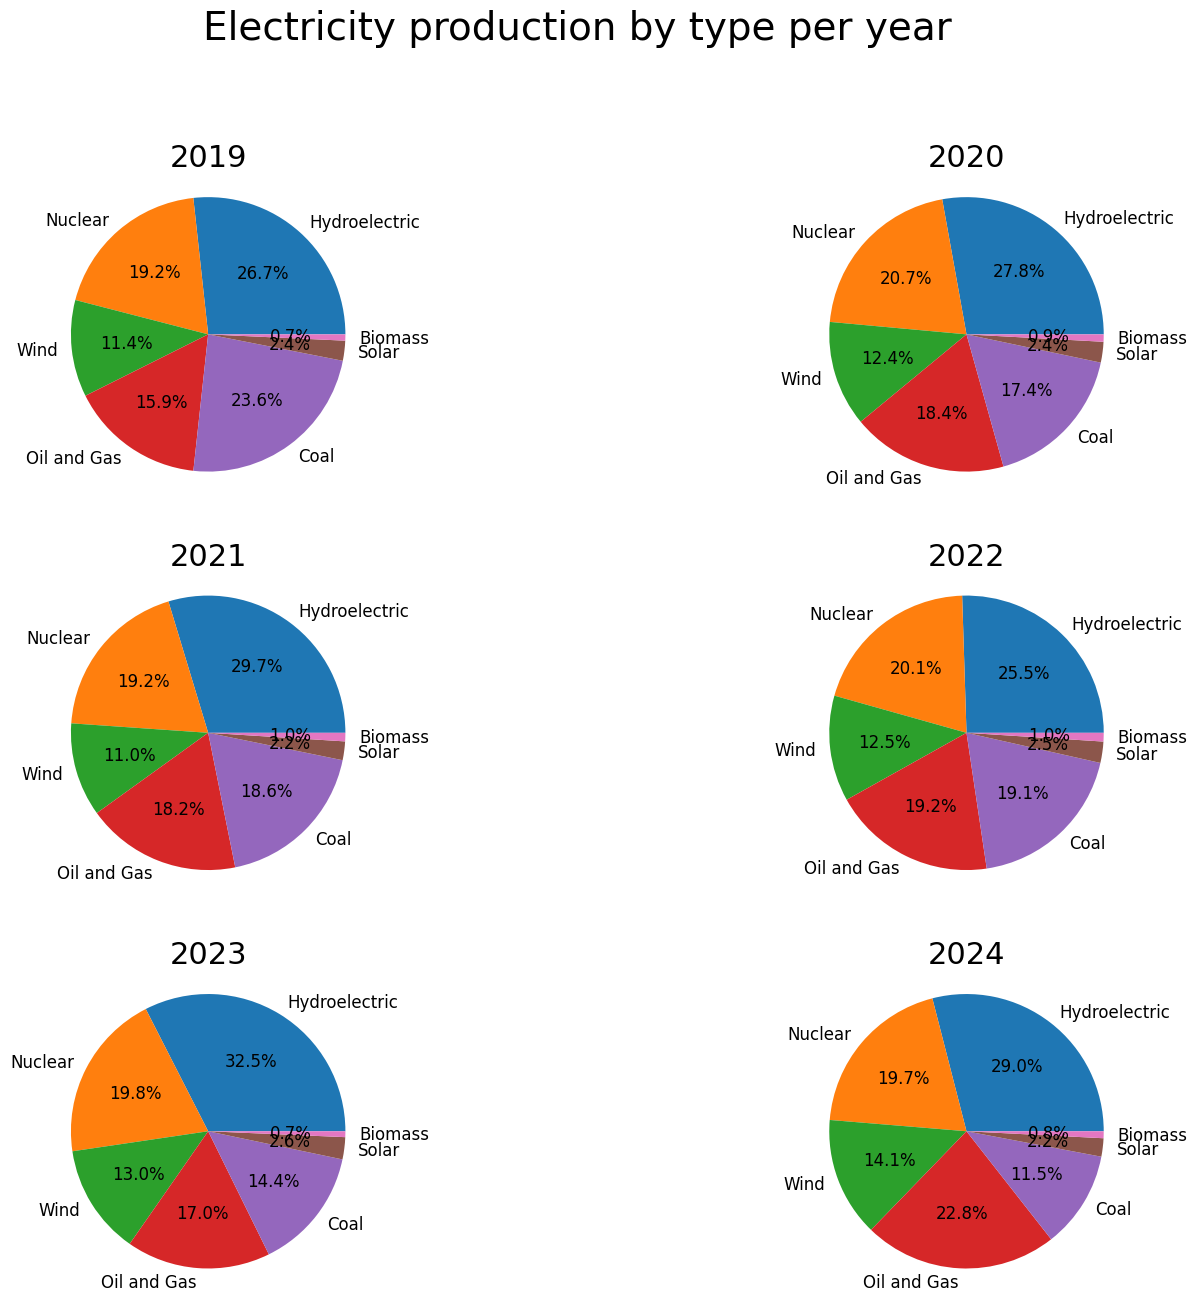

In [14]:
groupedByYear = df.groupby(df.index.year, group_keys=True)

statsByYear = {}

for g in groupedByYear:
    print(g[0], len(g[1]), type(g[1]))

    stats = {}

    totalHydroelectric = 0
    for v in g[1]["Hydroelectric"]:
        totalHydroelectric += v
    stats["Hydroelectric"] = totalHydroelectric

    totalNuclear = 0
    for v in g[1]["Nuclear"]:
        totalNuclear += v
    stats["Nuclear"] = totalNuclear

    totalWind = 0
    for v in g[1]["Wind"]:
        totalWind += v
    stats["Wind"] = totalWind

    totalOilandGas = 0
    for v in g[1]["Oil and Gas"]:
        totalOilandGas += v
    stats["Oil and Gas"] = totalOilandGas

    totalCoal = 0
    for v in g[1]["Coal"]:
        totalCoal += v
    stats["Coal"] = totalCoal

    totalSolar = 0
    for v in g[1]["Solar"]:
        totalSolar += v
    stats["Solar"] = totalSolar

    totalBiomass = 0
    for v in g[1]["Biomass"]:
        totalBiomass += v
    stats["Biomass"] = totalBiomass

    statsByYear[g[0]] = stats

fig, axs = plt.subplots(int(math.ceil(len(statsByYear) / 2)), 2, figsize=(16, 14))
fig.suptitle("Electricity production by type per year", size=28)
fig.tight_layout(pad=6)

for (k, v), ax in zip(statsByYear.items(), axs.flatten()):

    labels = list(v.keys())
    arr = np.array(list(v.values()))

    ax.pie(arr, labels = labels, autopct = '%1.1f%%', radius = 1.2, textprops={'fontsize': 12})
    ax.set_title(k, pad=18, size=22)